# Library

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
DeviceStrategy_CPU()
from preprocessing_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *

Cuda is Ready?  True

Tensorflow Version:  2.18.0
Keras Version:  3.7.0
Torch Version:  2.5.0+cu124


In [7]:
# 선택한 컬럼
selected_cols = ['평생학습 효과성 평균', '학습 지향 평균', '직업관련 목표지향 평균', '무형식학습(의존형) 참여', 
                    '무형식학습(온라인) 참여', '무형식학습 (암묵적 학습) 참여', '사회참여', 
                    '문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?', '문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?',
                    '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1', '문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?', 
                    '문E1-1) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 책이나 판서 수업 중심으로 공부하는 것이 익숙하고 잘된다.',
                    '문E1-2) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 인터넷강의 또는 컴퓨터(전자책^ 태블릿 PC^스마트폰)를 활용한 학습이 익숙하고 잘된다.',
                    '문E1-3) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 혼자서 공부하는 것이 익숙하고 좋다.',
                    '문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.',
                    '성별', '연령별(1)', '학력별', '경활상태', '월 가구소득', '지역규모별', '부양가족 유무', '건강에 대한 자신감', '취업구분',
                    '근로시간형태', '직업', '직장의 규모', '근무기간', '형식교육 참여자', 'key', '비형식교육 참여여부'        
    ]

# Hyperparameters

In [5]:
# 전처리
Y_colname = '비형식교육 참여여부'
test_size = 0.2
random_state = 123
LABEL_LIST = ['Non-engagement', 'Engagement']
sampling_strategy = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'
# 모델링
SHAP = True
X_TOP_DISPLAY = 50
DEPENDENCY = False
################
tf.random.set_seed(123)
NODE_MLP = [128, 256, 128, 64, 32, 10]
NODE_CNN1 = [128, 256, 128]
NODE_CNN2 = [64, 32, 10]
KERNEL_SIZE = 5
STRIDE = 1
PADDING = 'same'
POOL_SIZE = 2
POOL_STRIDE = 2
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'sigmoid'
REGULARIZER = None
# REGULARIZER = regularizers.l2(0.001)
DROPOUT_RATIO = 0.25
LOSS = 'binary_crossentropy'
LEARNING_RATE = 0.001
# OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']    # 'accuracy', 'Precision', 'Recall', 'AUC', 'F1Score'
VALIDATION_SPLIT = 0.25
VALIDATION_DATA = None
BATCH_SIZE = 64
EPOCHS = 1000
VERBOSE = 0
################
MONITOR = 'val_accuracy'    # 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'
MONITOR_MODE = 'max'
EARLYSTOP_PATIENT = 200

# Data Preprocessing

In [8]:
df_raw = preprocessing_edu(os.path.join('.', 'Data', 'df_merged.csv'))
# 모델링 데이터 선택
df_raw = df_raw[selected_cols]
# 종속변수 및 독립변수 설정
X_colname = [x for x in df.columns if x not in [Y_colname]]
print(df[Y_colname].value_counts())

# Train, Test 분리
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[[Y_colname]],
                                                    test_size=test_size, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print('Data Split!')
# 기술통계
# plot_classfrequency(df, Y_colname, label_list=label_list)
# comparisonstat_origin = table_ratiobyclass(df, Y_colname, label_list=label_list, sorting=True)
# display(comparisonstat_origin)
# comparisonstat_origin.to_csv(os.path.join(os.getcwd(), 'Result', 'DescriptiveStatistics_Binary.csv'), 
#                              index=True, encoding='utf-8-sig')
# 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())   

# 샘플링
if df[Y_colname].value_counts().sort_values(ascending=False).index[0] == 0:
    sampling_method = 'RandomUnderSampler'
    sampler, X_train, Y_train = undersampling(X_train, Y_train,
                                                method=sampling_method, strategy=sampling_strategy,
                                                random_state=random_state)
else:
    sampling_method = 'SMOTE' # 'SMOTETomek' #'ADASYN'
    sampler, X_train, Y_train = oversampling(X_train, Y_train, 
                                                     method=sampling_method, strategy=sampling_strategy, 
                                                     random_state=random_state)

KeyError: "['평생학습 효과성 평균', '비형식교육 참여여부'] not in index"

# Modeling

Explanations of Y:


,Features,Coef,Odds,Features,Coef,Odds
0,학습 지향 평균,6.7840,883.5682,취업구분,-0.8065,0.4464
1,문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?,6.4115,608.7804,key,-0.4945,0.6098
2,직업관련 목표지향 평균,2.3134,10.1085,형식교육 참여자,-0.4090,0.6643
3,문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.,1.5908,4.9075,학력별,-0.3843,0.6809
4,연령별(1),1.2723,3.5690,지역규모별,-0.2636,0.7683
5,DQ6. 귀하께서는 건강에 자신 있습니까?,1.0550,2.8720,성별,-0.1329,0.8756
6,경활상태,0.8062,2.2394,부양가족 유무,-0.1135,0.8927
7,문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1,0.7787,2.1786,근무기간,-0.1122,0.8939
8,문E1-2) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 인터넷강의 또는 컴퓨터(전자책^ 태블릿 PC^스마트폰)를 활용한 학습...,0.6465,1.9089,무형식학습(온라인) 참여,-0.0889,0.9150
9,문E1-3) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 혼자서 공부하는 것이 익숙하고 좋다.,0.5973,1.8173,무형식학습(의존형) 참여,-0.0476,0.9535


Performance: 


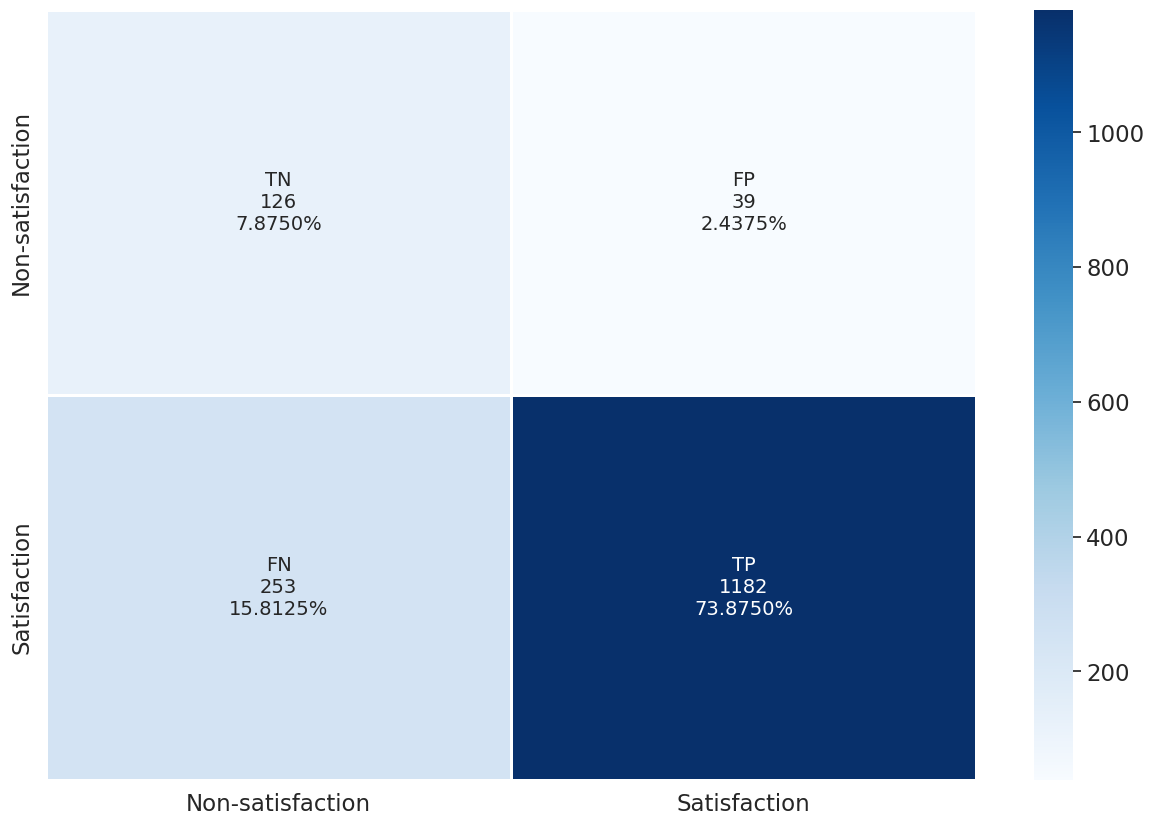

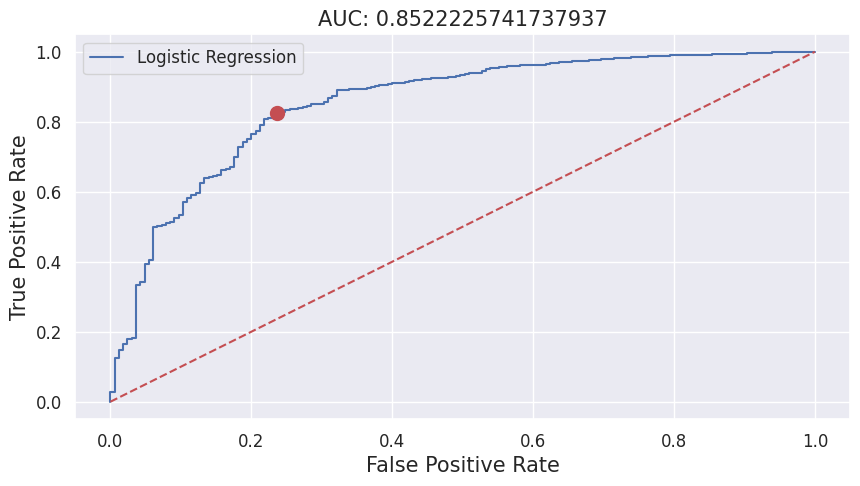

LogisticRegression(class_weight='balanced')

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,1600,1182,126,39,253,0.9681,0.8237,0.7636,0.8901,0.8175,0.7937,0.8522


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,13002,5809,4643,1223,1327,0.8261,0.8140,0.7915,0.8200,0.8039,0.8028,0.8846


In [50]:
model_lr, Score_te_lr, Score_trte_lr = modeling_LogisticRegression(X_train, Y_train, X_test, Y_test, 
                                                         X_colname=X_colname,
                                                         shap=not SHAP,
                                                         X_top_display=X_TOP_DISPLAY,
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lr, Score_te_lr, Score_trte_lr)

Explanations of Y:


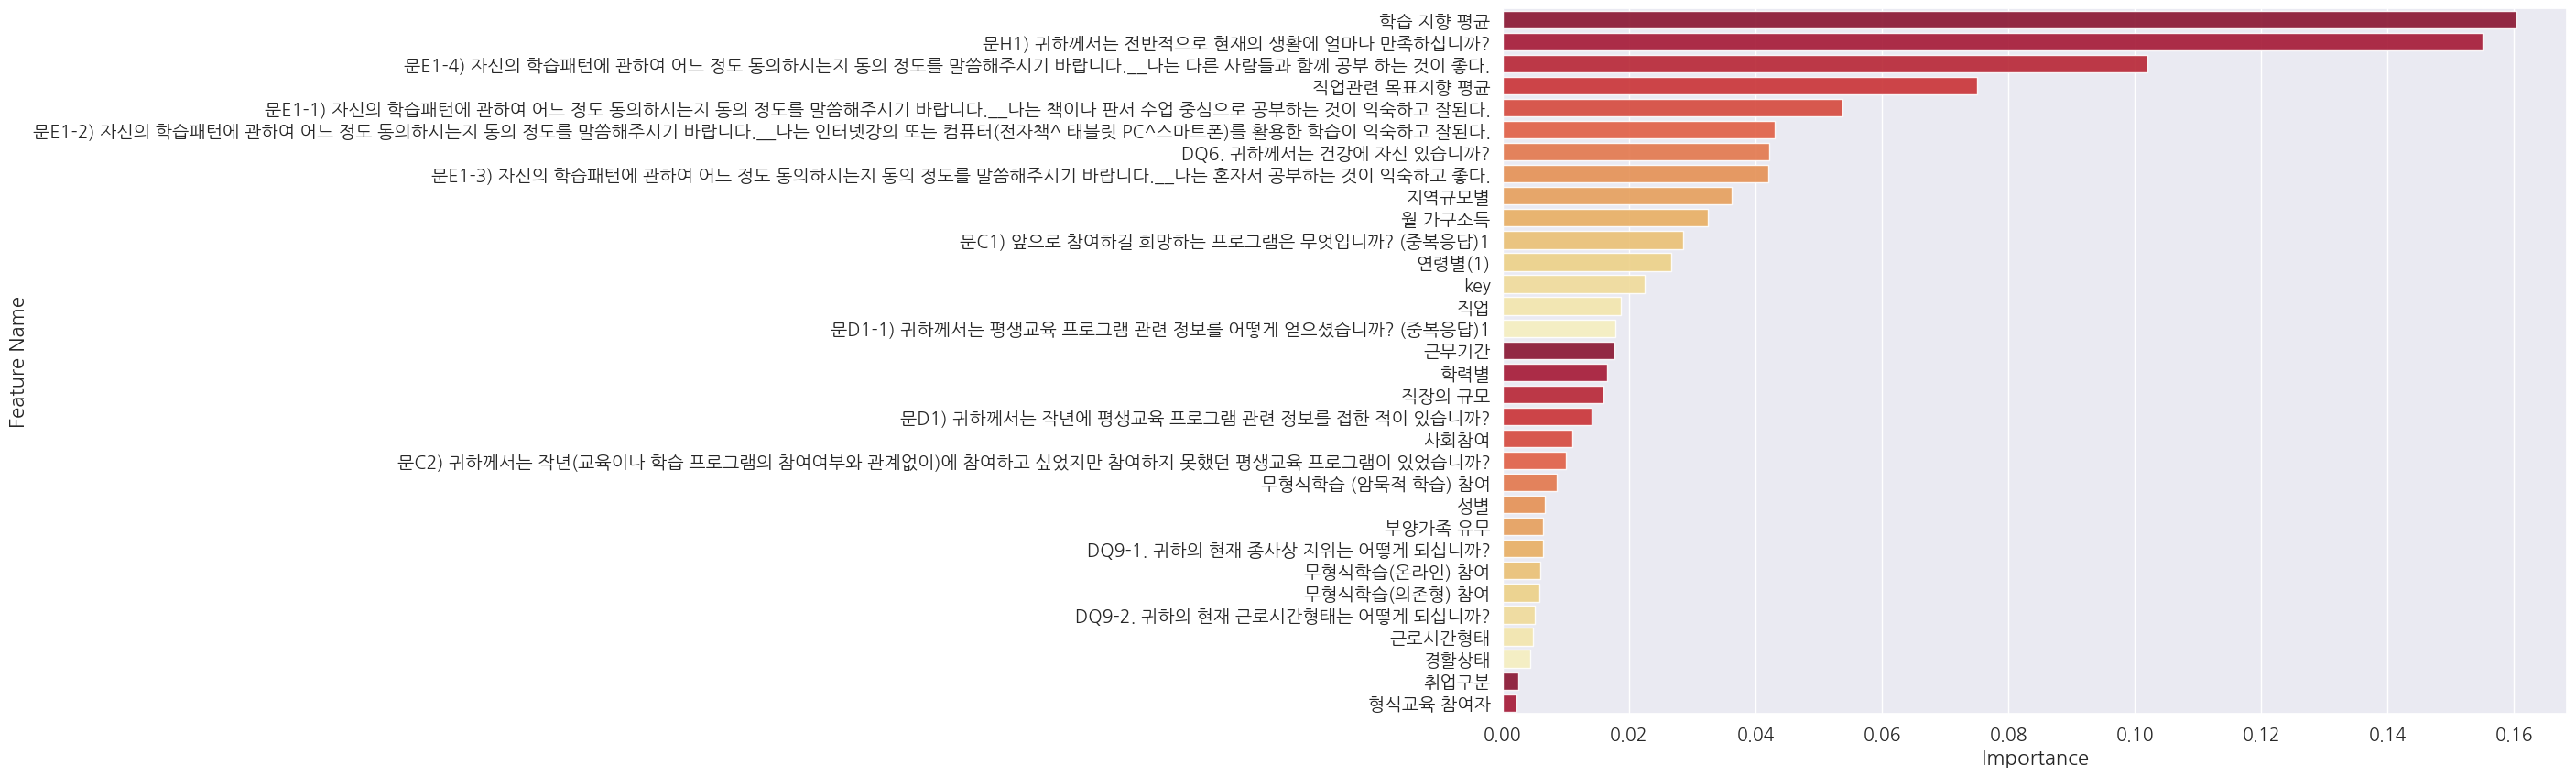

Performance: 


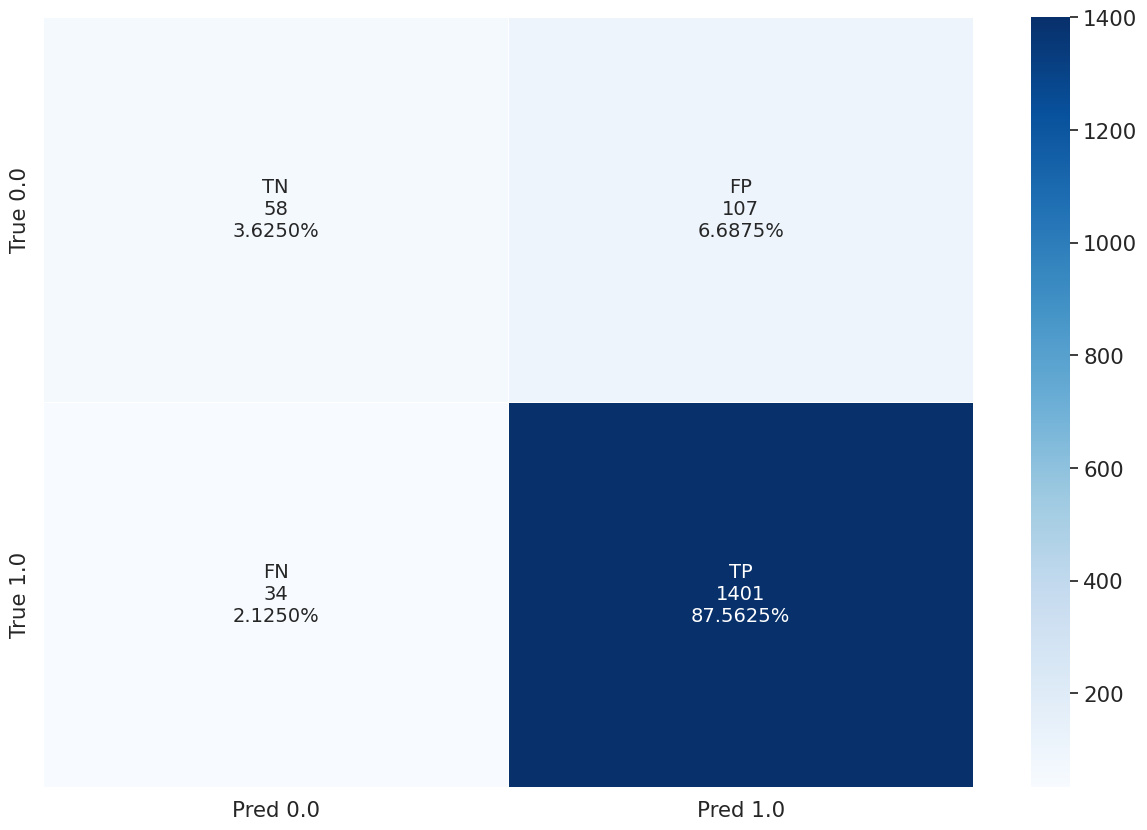

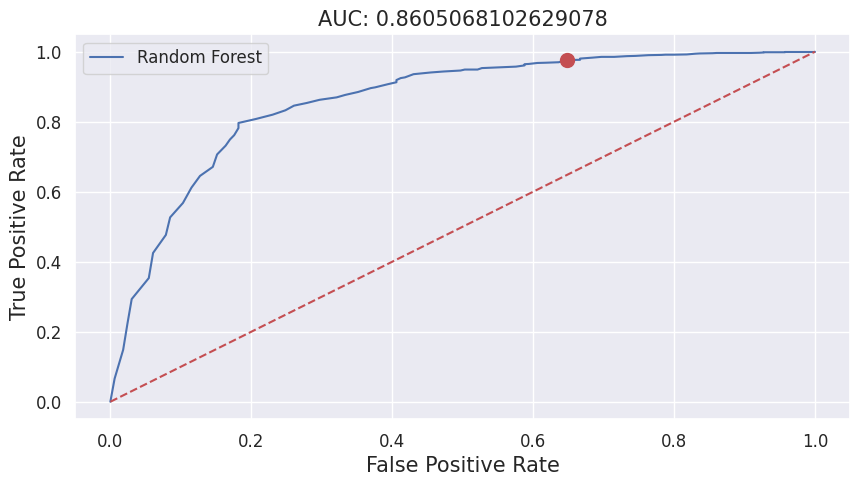

RandomForestClassifier(class_weight='balanced', random_state=123)

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,1600,1401,58,107,34,0.9290,0.9763,0.3515,0.9521,0.9119,0.6639,0.8605


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,13002,7102,5758,108,34,0.9850,0.9952,0.9816,0.9901,0.9891,0.9884,0.9981


In [51]:
model_rf, Score_te_rf, Score_trte_rf = modeling_RandomForestClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_rf, Score_te_rf, Score_trte_rf)

Explanations of Y:


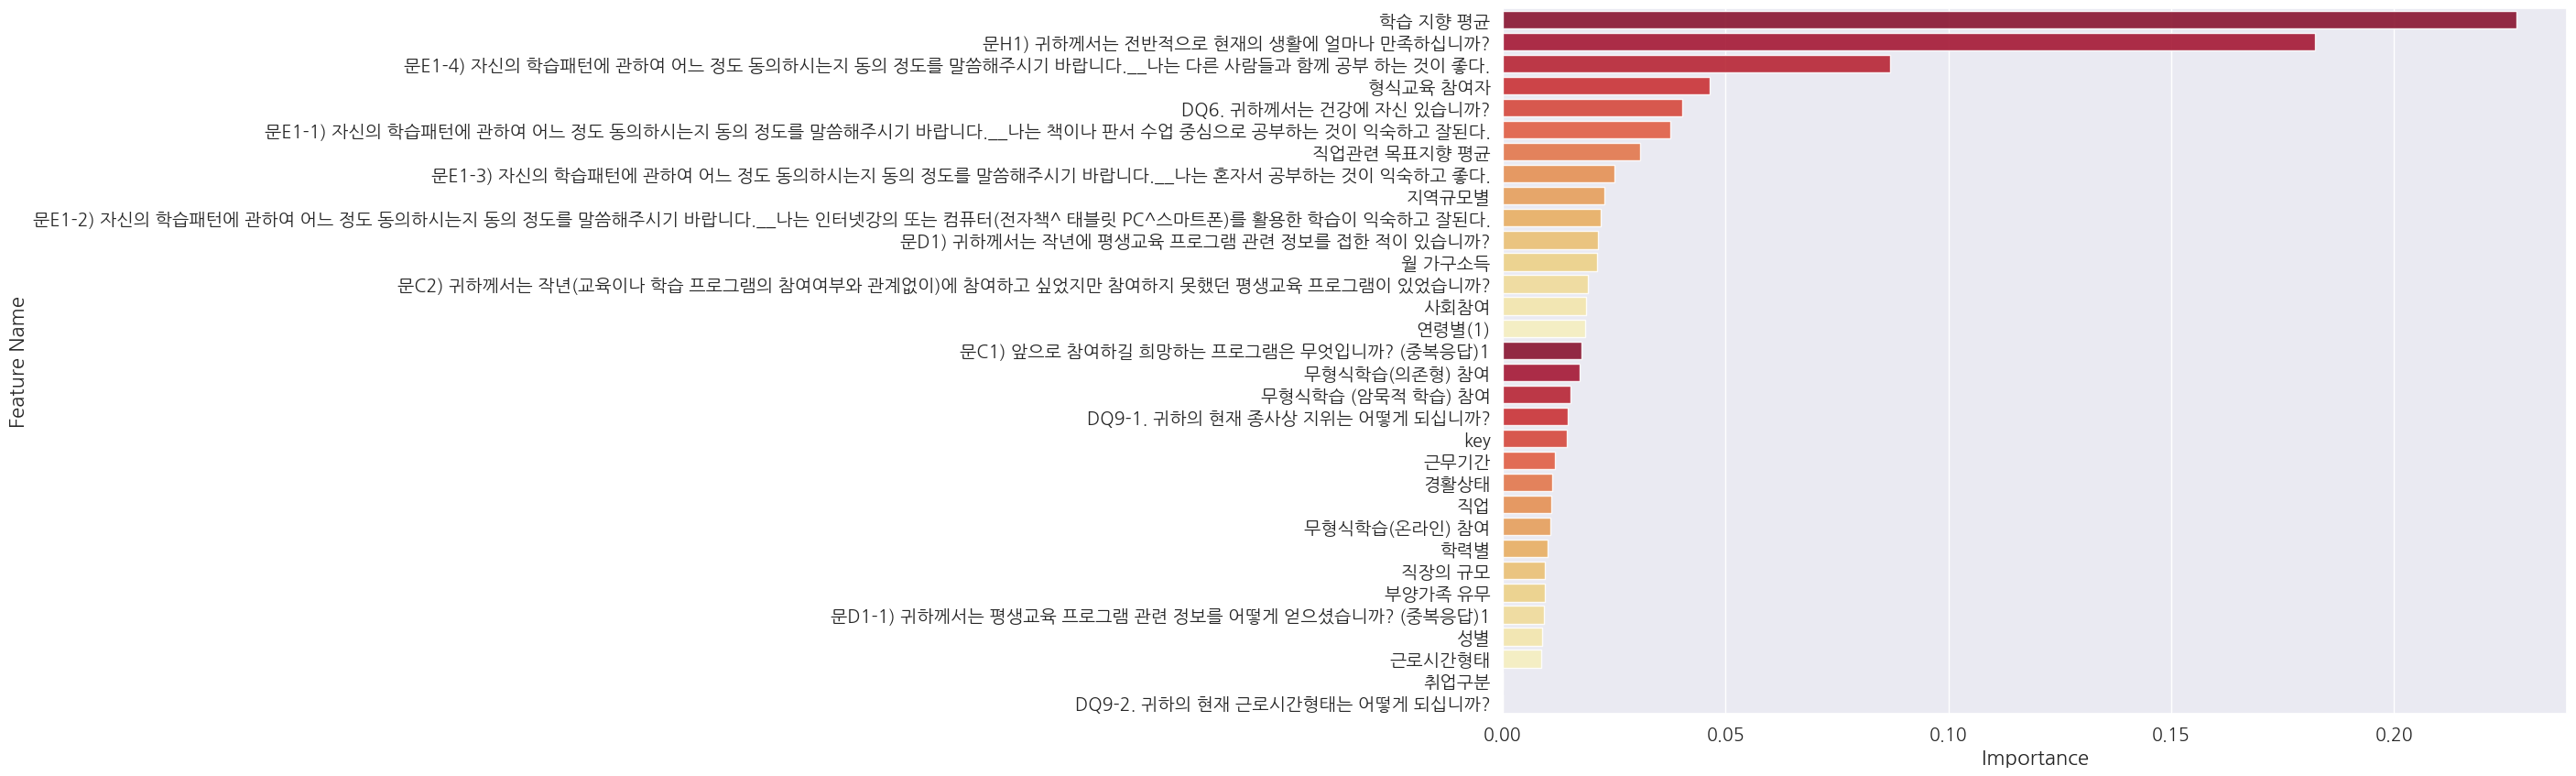

Performance: 


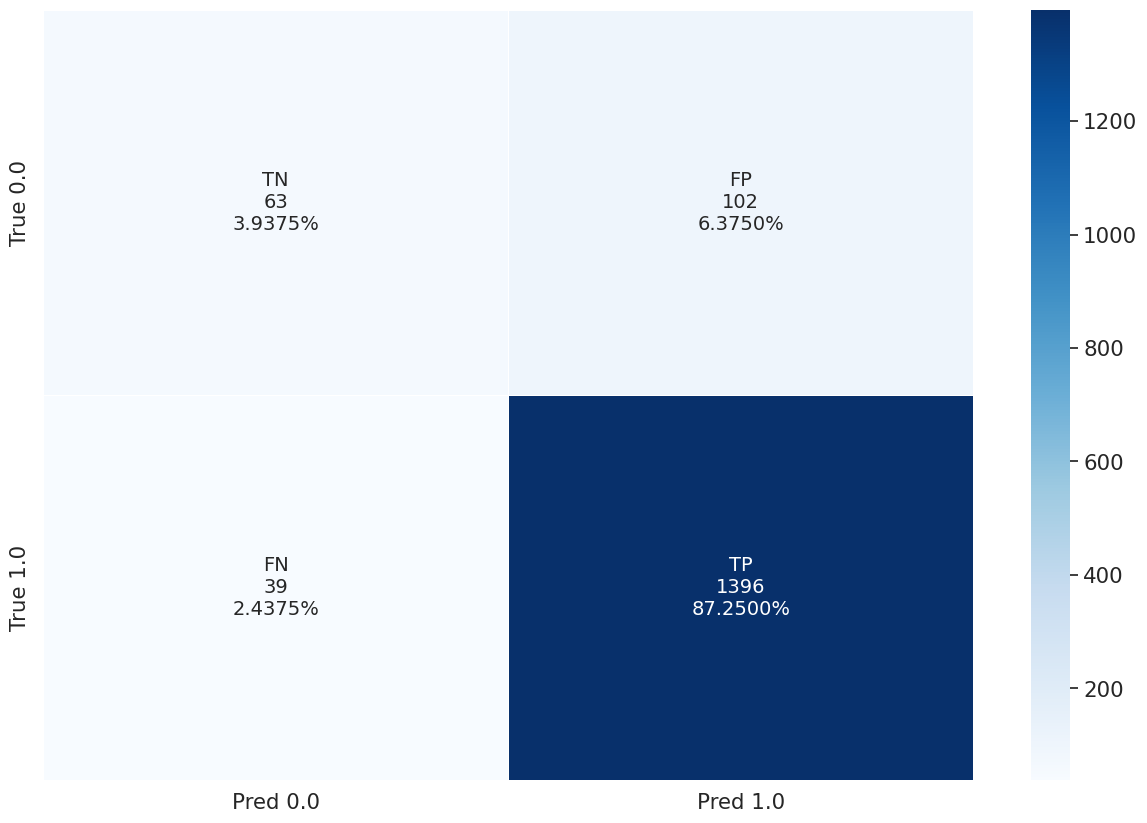

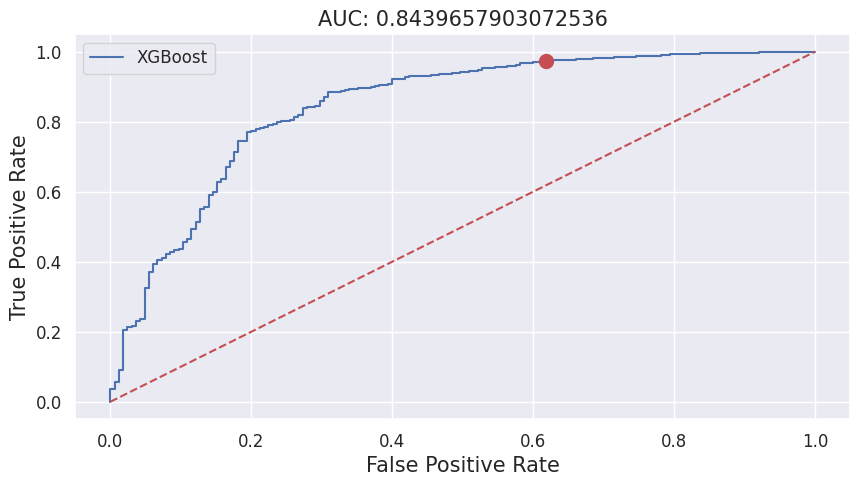

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,1600,1396,63,102,39,0.9319,0.9728,0.3818,0.9519,0.9119,0.6773,0.8440


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,13002,7097,5722,144,39,0.9801,0.9945,0.9755,0.9873,0.9859,0.9850,0.9961


In [52]:
model_xgb, Score_te_xgb, Score_trte_xgb = modeling_XGBClassifier(X_train, Y_train, 
                                                      X_test, Y_test, 
                                                      X_colname=X_colname, 
                                                      shap=not SHAP, 
                                                      X_top_display=X_TOP_DISPLAY, 
                                                      dependency=DEPENDENCY,
                                                      label_list=LABEL_LIST)
display(model_xgb, Score_te_xgb, Score_trte_xgb)

[LightGBM] [Info] Number of positive: 5701, number of negative: 5701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7691
[LightGBM] [Info] Number of data points in the train set: 11402, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Explanations of Y:


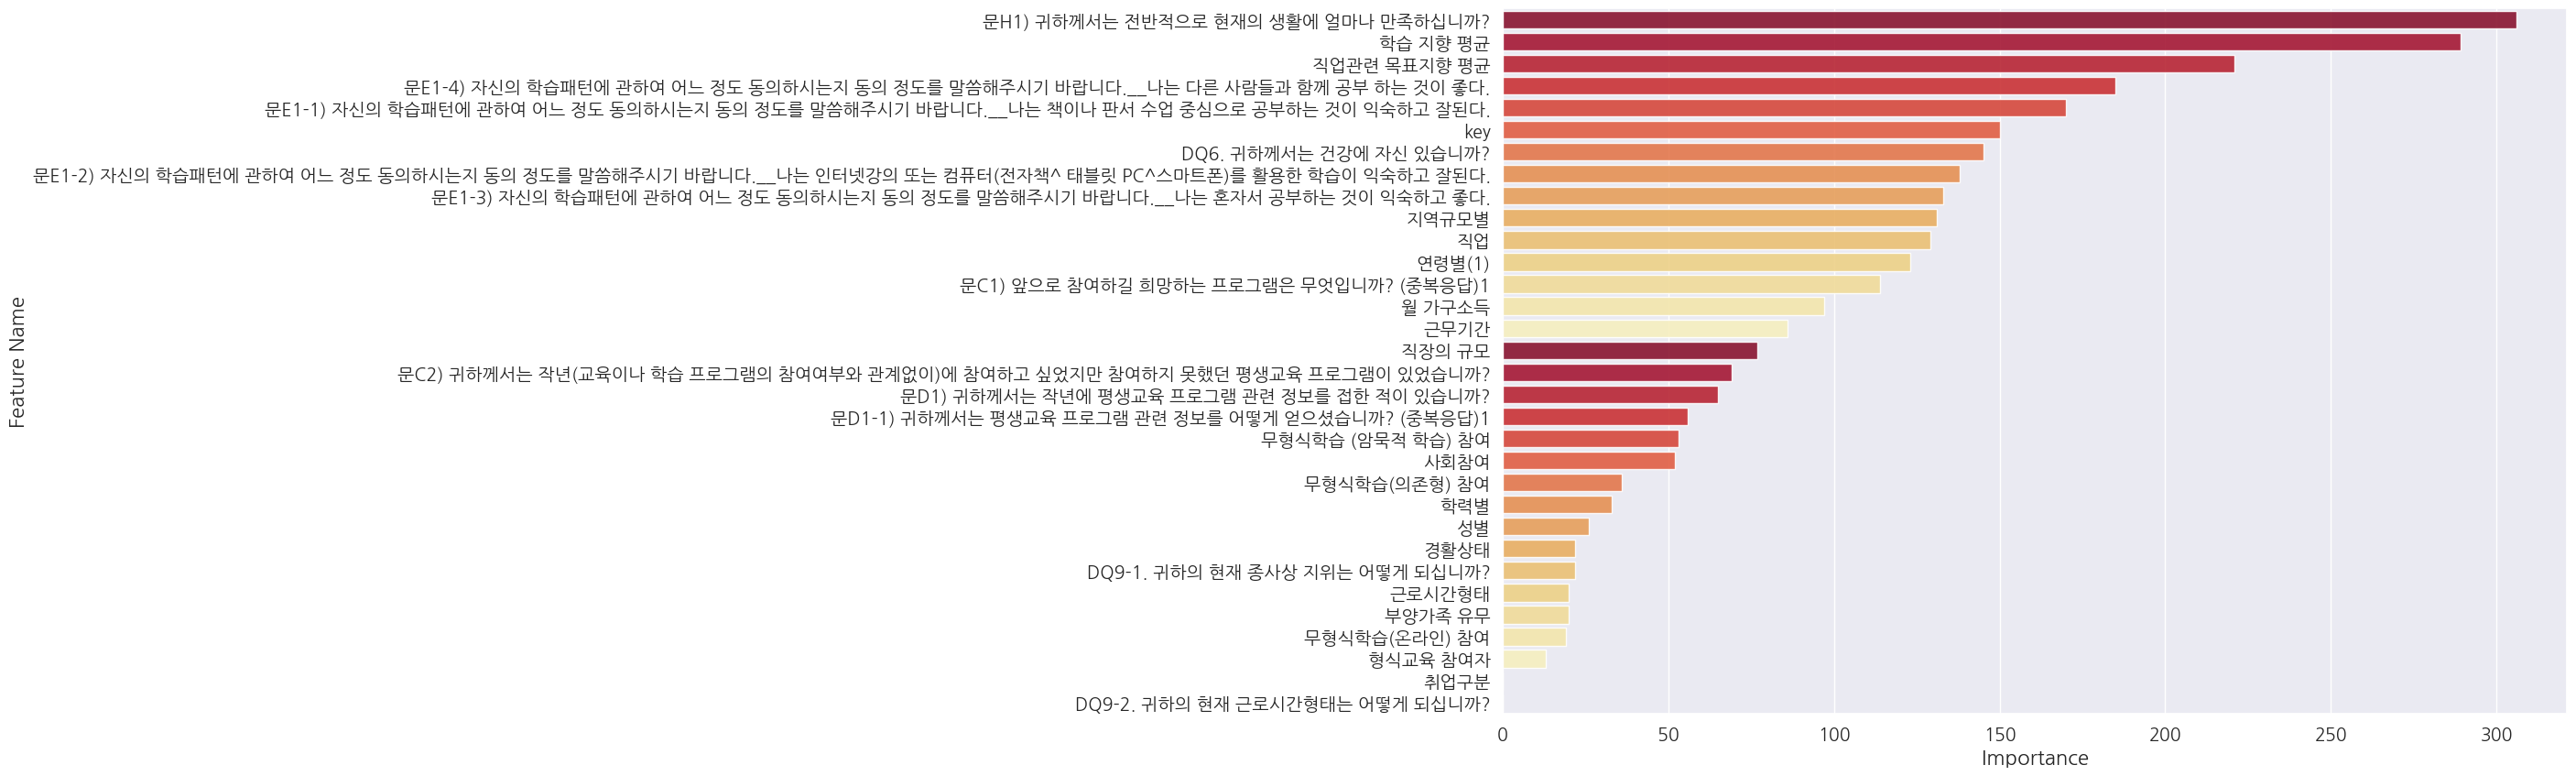

Performance: 


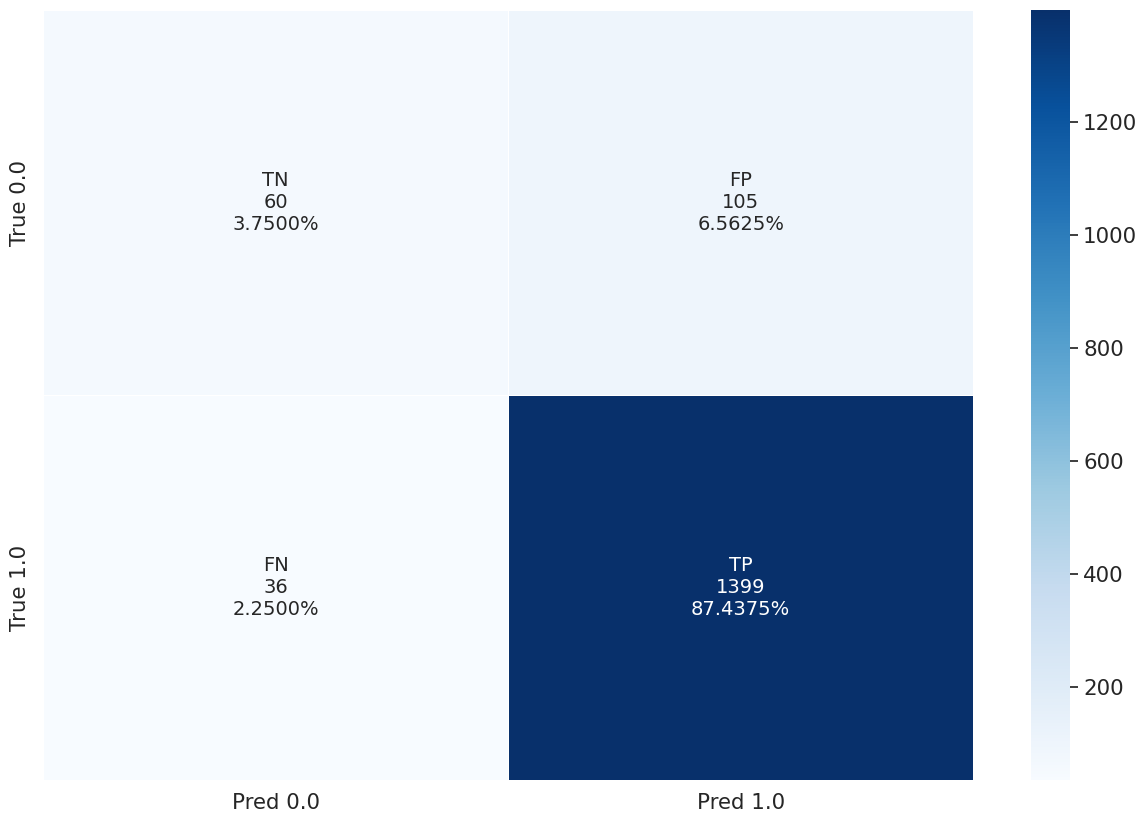

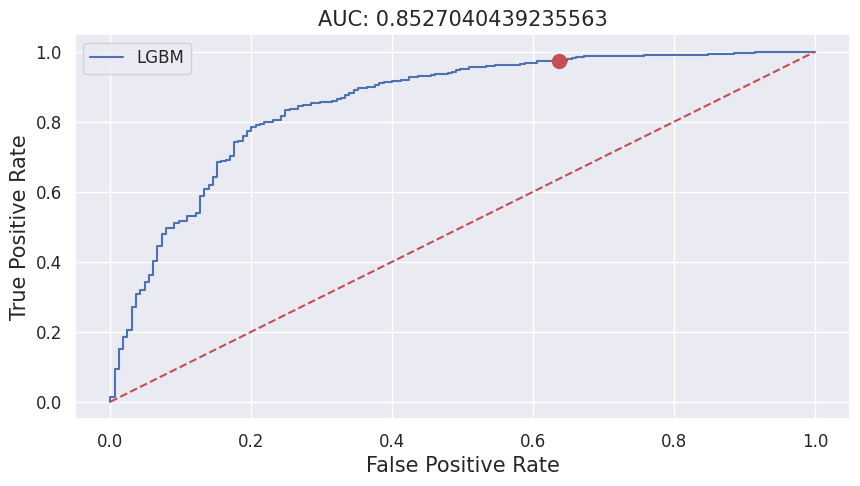

LGBMClassifier(class_weight='balanced', random_state=123)

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,1600,1399,60,105,36,0.9302,0.9749,0.3636,0.9520,0.9119,0.6693,0.8527


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,13002,7083,5539,327,53,0.9559,0.9926,0.9443,0.9739,0.9708,0.9684,0.9943


In [53]:
model_lgbm, Score_te_lgbm, Score_trte_lgbm = modeling_LGBMClassifier(X_train, Y_train, 
                                                         X_test, Y_test, 
                                                         X_colname=X_colname, 
                                                         shap=not SHAP, 
                                                         X_top_display=X_TOP_DISPLAY, 
                                                         dependency=DEPENDENCY,
                                                         label_list=LABEL_LIST)
display(model_lgbm, Score_te_lgbm, Score_trte_lgbm)

Learning rate set to 0.240583
0:	learn: 0.4769071	total: 10.3ms	remaining: 1.02s
1:	learn: 0.3955457	total: 15.8ms	remaining: 773ms
2:	learn: 0.3408902	total: 19.6ms	remaining: 634ms
3:	learn: 0.3045375	total: 25.1ms	remaining: 601ms
4:	learn: 0.2650917	total: 29.6ms	remaining: 563ms
5:	learn: 0.2470925	total: 33.8ms	remaining: 530ms
6:	learn: 0.2368213	total: 39.1ms	remaining: 520ms
7:	learn: 0.2169640	total: 44.3ms	remaining: 509ms
8:	learn: 0.2060572	total: 50.4ms	remaining: 510ms
9:	learn: 0.2010461	total: 54.5ms	remaining: 491ms
10:	learn: 0.1886989	total: 59.4ms	remaining: 481ms
11:	learn: 0.1791651	total: 63.6ms	remaining: 466ms
12:	learn: 0.1739958	total: 67.8ms	remaining: 454ms
13:	learn: 0.1690061	total: 72ms	remaining: 442ms
14:	learn: 0.1656792	total: 76.5ms	remaining: 433ms
15:	learn: 0.1639747	total: 80ms	remaining: 420ms
16:	learn: 0.1615050	total: 83.8ms	remaining: 409ms
17:	learn: 0.1587047	total: 88.5ms	remaining: 403ms
18:	learn: 0.1549685	total: 92.2ms	remaining: 39

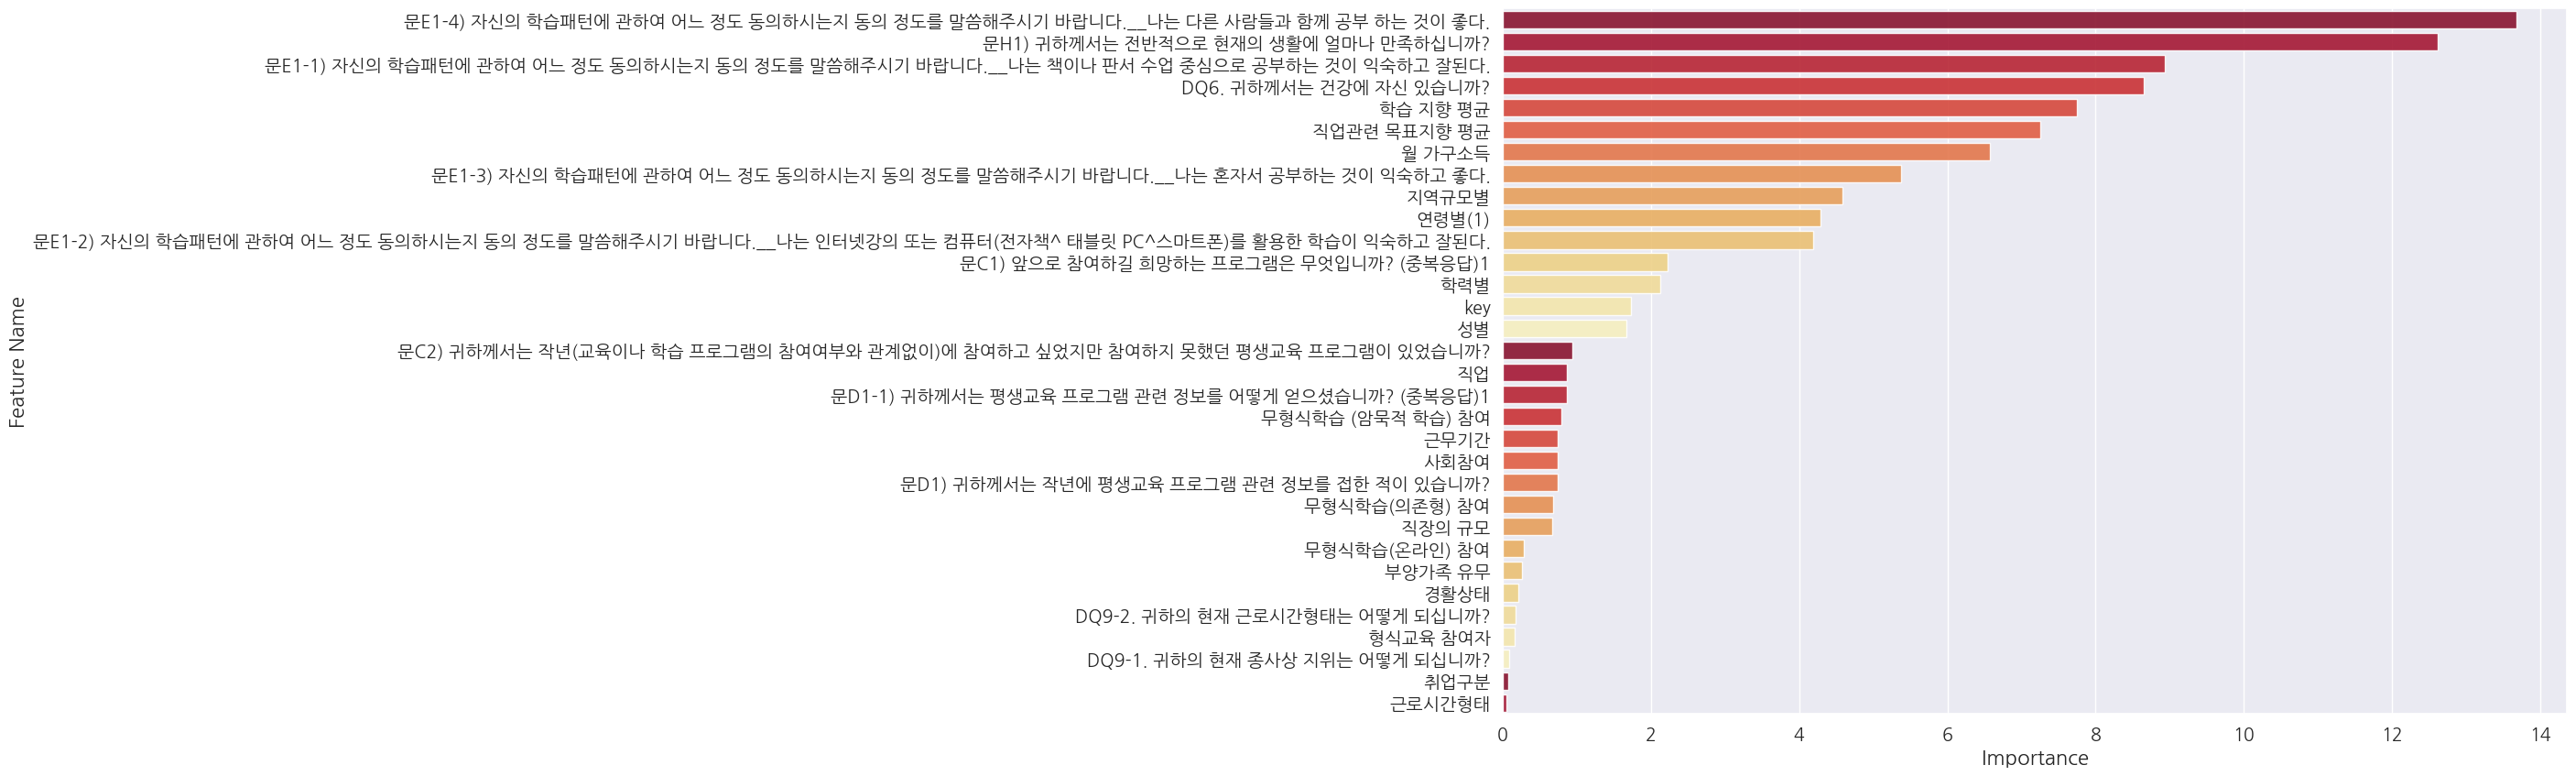

Performance: 


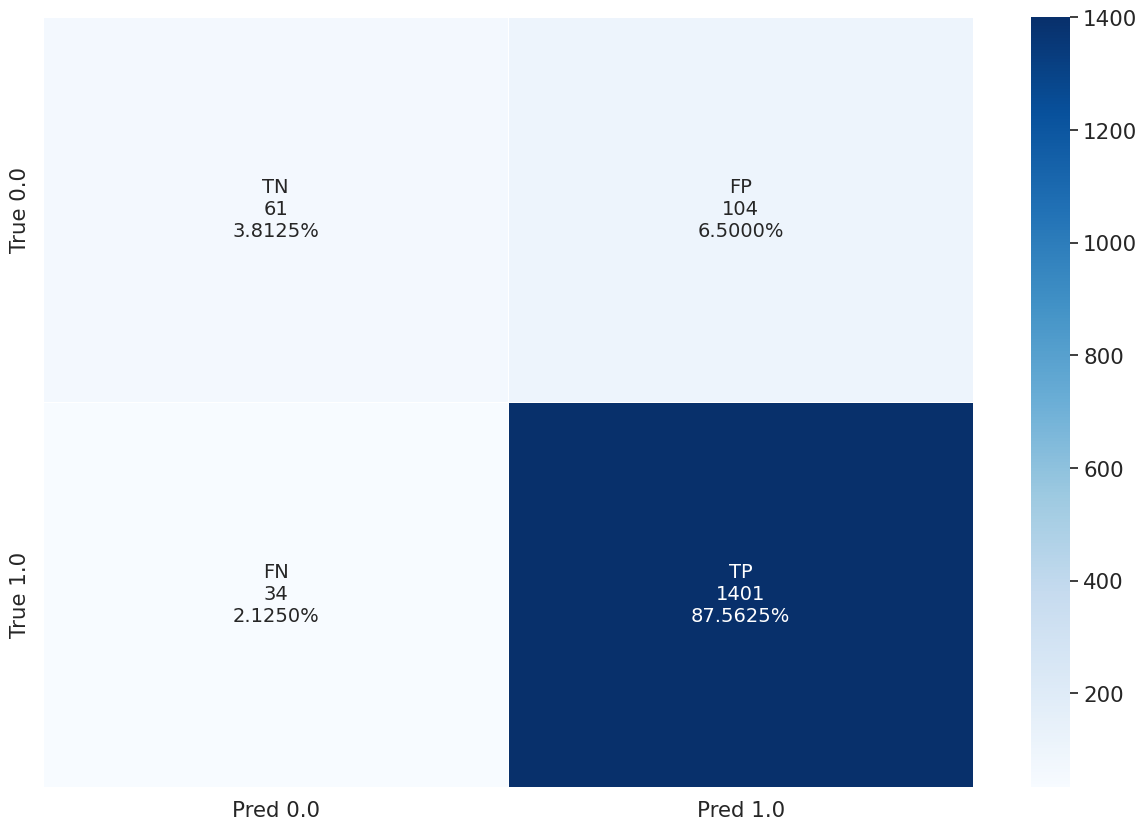

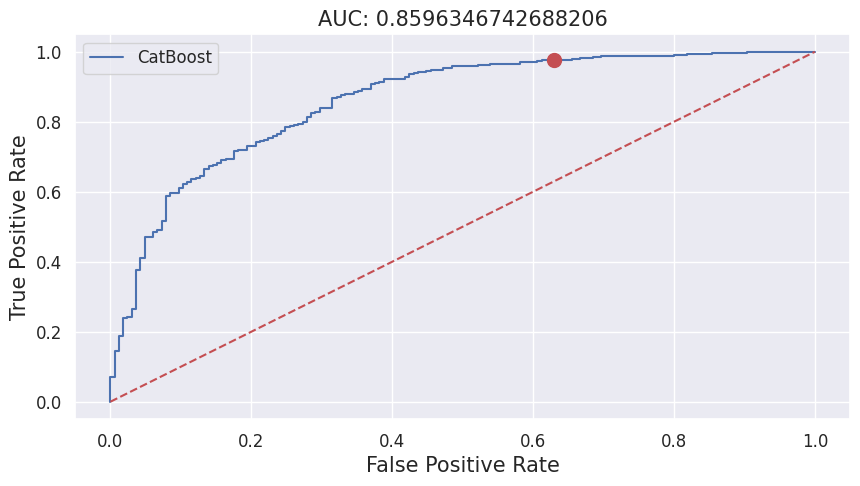

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,1600,1401,61,104,34,0.9309,0.9763,0.3697,0.9531,0.9137,0.6730,0.8596


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,13002,7084,5556,310,52,0.9581,0.9927,0.9472,0.9751,0.9722,0.9699,0.9939


In [54]:
model_catb, Score_te_catb, Score_trte_catb = modeling_CatBoostClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_catb, Score_te_catb, Score_trte_catb)

# Summary

In [55]:
folder_location = os.path.join(os.getcwd(),'Result')
prediction_summary(folder_location=folder_location, 
                   algonames=['Logistic Regression', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost'])


,Dataset,Algorithm,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
0,Test set,Logistic Regression,1600,1182,126,39,253,0.968059,0.823693,0.763636,0.890060,0.817500,0.793665,0.852223
1,Test set,Random Forest,1600,1401,58,107,34,0.929045,0.976307,0.351515,0.952090,0.911875,0.663911,0.860507
2,Test set,XGBoost,1600,1396,63,102,39,0.931909,0.972822,0.381818,0.951926,0.911875,0.677320,0.843966
3,Test set,LGBM,1600,1399,60,105,36,0.930186,0.974913,0.363636,0.952024,0.911875,0.669275,0.852704
4,Test set,CatBoost,1600,1401,61,104,34,0.930897,0.976307,0.369697,0.953061,0.913750,0.673002,0.859635


,Dataset,Algorithm,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
0,Entire population,Logistic Regression,13002,5809,4643,1223,1327,0.826081,0.814041,0.791510,0.820017,0.803876,0.802776,0.884586
1,Entire population,Random Forest,13002,7102,5758,108,34,0.985021,0.995235,0.981589,0.990102,0.989079,0.988412,0.998053
2,Entire population,XGBoost,13002,7097,5722,144,39,0.980113,0.994535,0.975452,0.987271,0.985925,0.984993,0.996068
3,Entire population,LGBM,13002,7083,5539,327,53,0.955870,0.992573,0.944255,0.973876,0.970774,0.968414,0.994275
4,Entire population,CatBoost,13002,7084,5556,310,52,0.958074,0.992713,0.947153,0.975086,0.972158,0.969933,0.993925


# Prediction and Comparison

In [56]:
# Train, Test 분리
X_test, Y_test = df_test[X_colname], df_test[[Y_colname]]
print(X_test.shape, Y_test.shape)
print('Data Split!')
# 스케일링
X_test = scaler.transform(X_test)
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())   

(12514, 32) (12514, 1)
Data Split!
(12514, 32) (12514, 1) -0.1111111111111111 1.0000000000000002


Learning rate set to 0.240583
0:	learn: 0.4769071	total: 9.75ms	remaining: 965ms
1:	learn: 0.3955457	total: 13.9ms	remaining: 683ms
2:	learn: 0.3408902	total: 18.4ms	remaining: 596ms
3:	learn: 0.3045375	total: 26.6ms	remaining: 639ms
4:	learn: 0.2650917	total: 31.6ms	remaining: 600ms
5:	learn: 0.2470925	total: 36.4ms	remaining: 570ms
6:	learn: 0.2368213	total: 42.7ms	remaining: 567ms
7:	learn: 0.2169640	total: 47.6ms	remaining: 548ms
8:	learn: 0.2060572	total: 54.9ms	remaining: 555ms
9:	learn: 0.2010461	total: 61.8ms	remaining: 556ms
10:	learn: 0.1886989	total: 66ms	remaining: 534ms
11:	learn: 0.1791651	total: 71.5ms	remaining: 524ms
12:	learn: 0.1739958	total: 75.9ms	remaining: 508ms
13:	learn: 0.1690061	total: 79.8ms	remaining: 490ms
14:	learn: 0.1656792	total: 86.5ms	remaining: 490ms
15:	learn: 0.1639747	total: 90.9ms	remaining: 477ms
16:	learn: 0.1615050	total: 97.9ms	remaining: 478ms
17:	learn: 0.1587047	total: 102ms	remaining: 467ms
18:	learn: 0.1549685	total: 109ms	remaining: 46

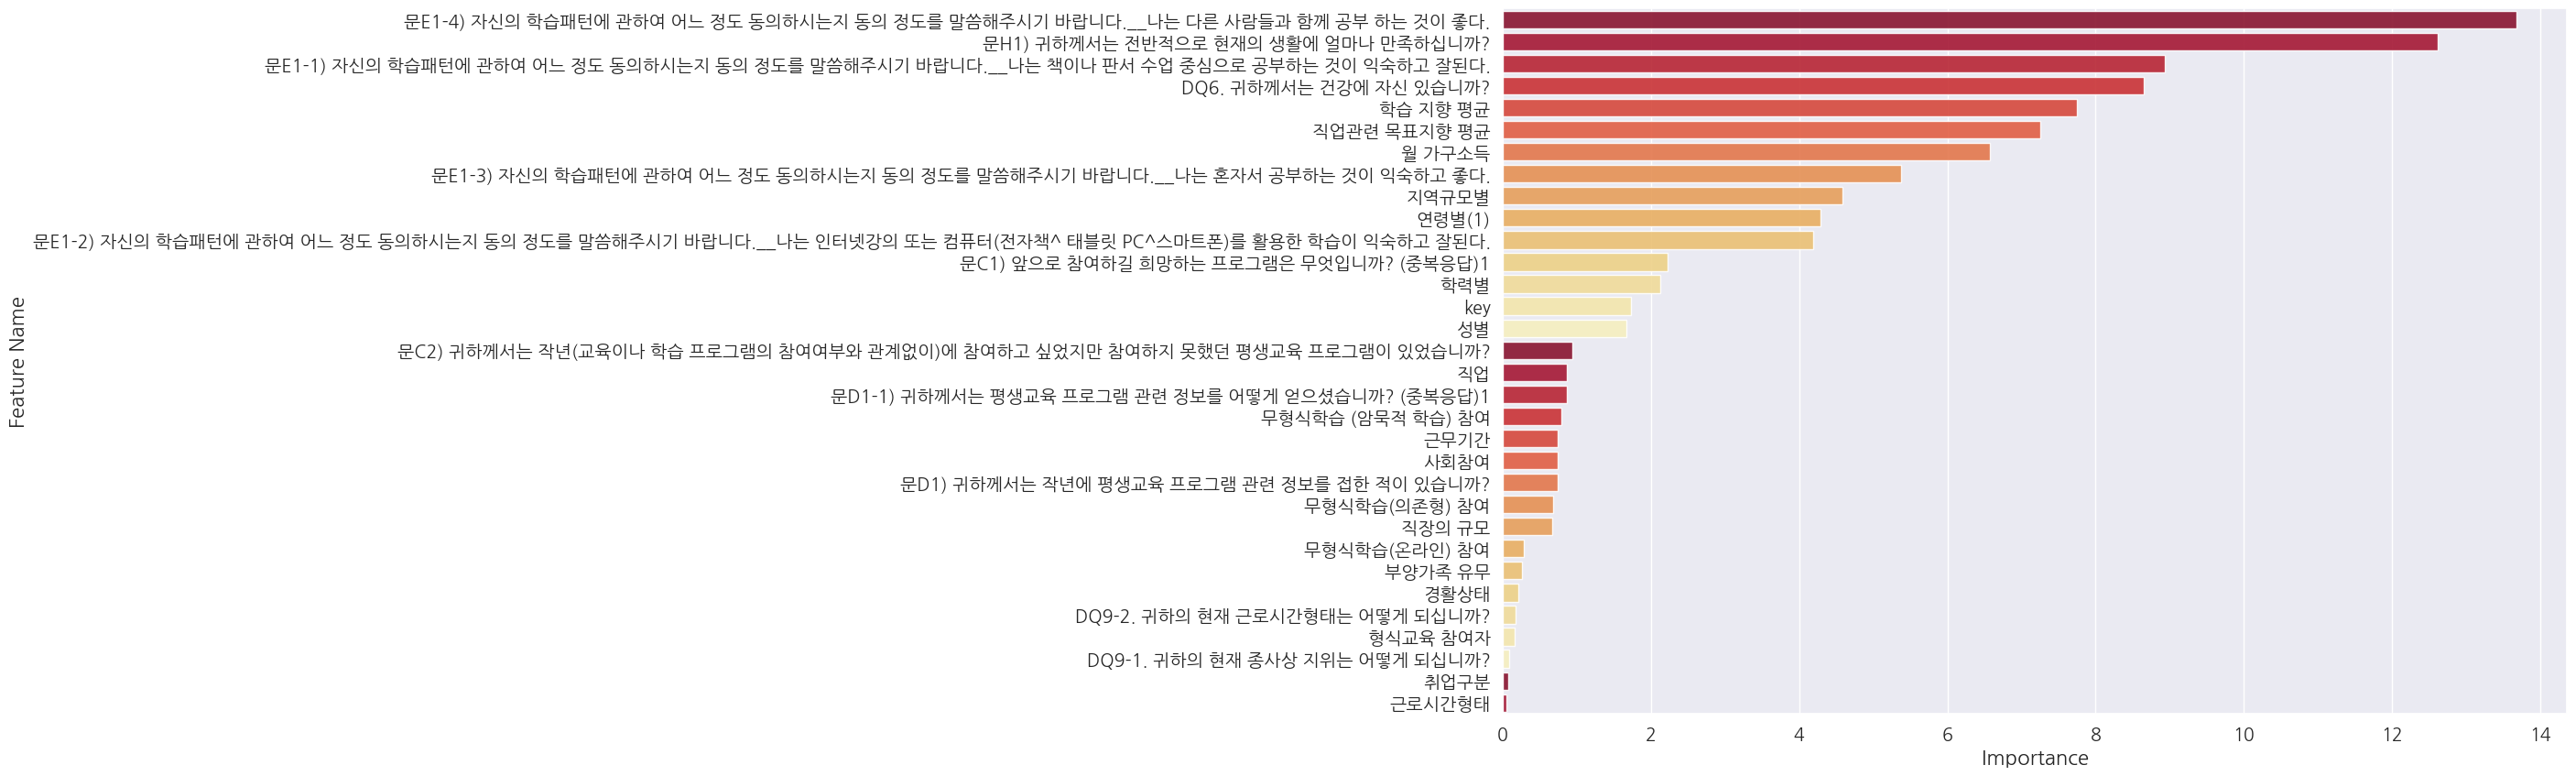

Performance: 


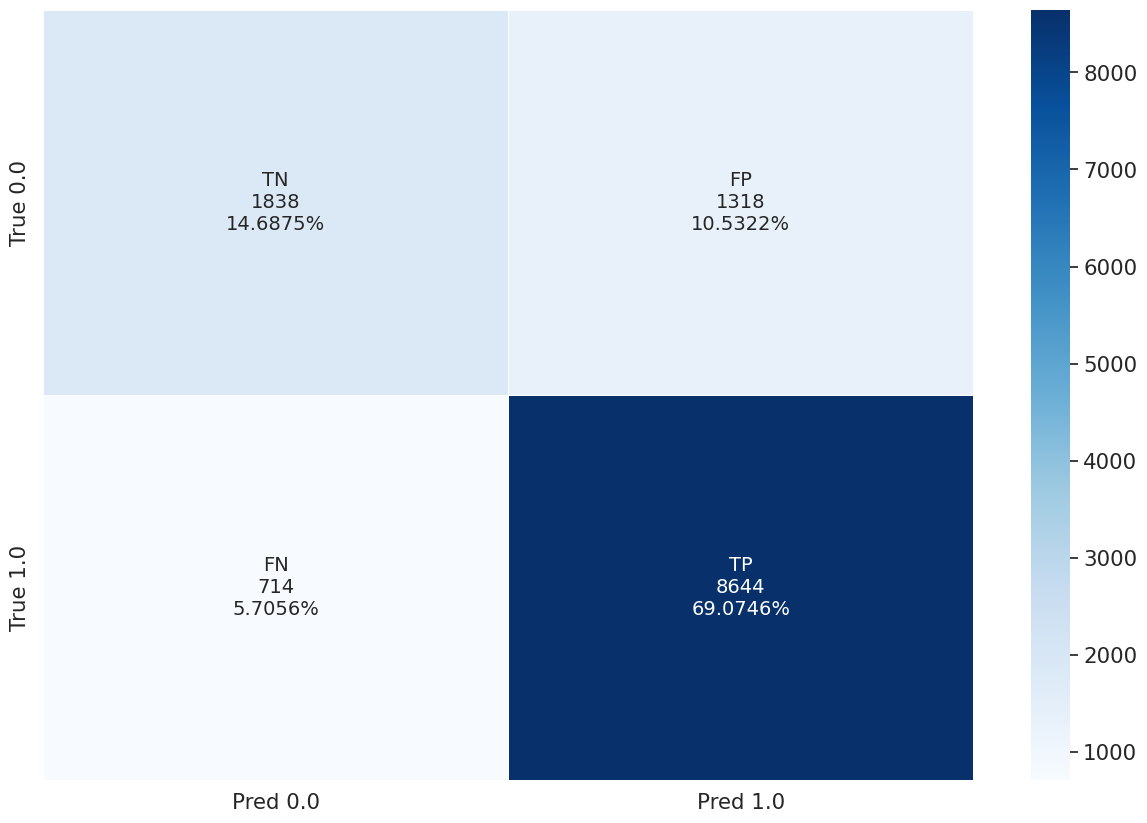

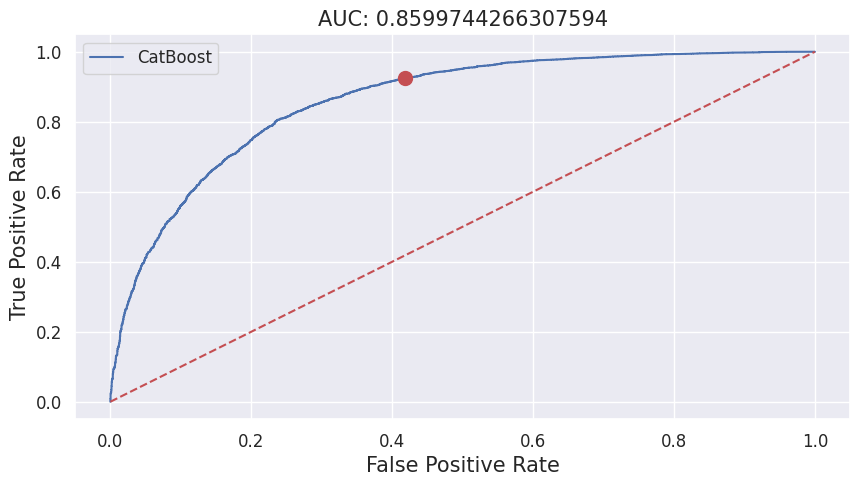

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,12514,8644,1838,1318,714,0.8677,0.9237,0.5824,0.8948,0.8376,0.7530,0.8600


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,23916,14327,7333,1524,732,0.9039,0.9514,0.8279,0.9270,0.9057,0.8897,0.9560


In [57]:
model_catb, Score_te_catb, Score_trte_catb = modeling_CatBoostClassifier(X_train, Y_train, 
                                                             X_test, Y_test, 
                                                             X_colname=X_colname, 
                                                             shap=not SHAP, 
                                                             X_top_display=X_TOP_DISPLAY, 
                                                             dependency=DEPENDENCY,
                                                             label_list=LABEL_LIST)
display(model_catb, Score_te_catb, Score_trte_catb)

In [58]:
# 코멘트
# 비형식교육 참여자 변수 삭제하고 학습한건가?
# 왜 oversampling을 고려하지 않았지?
# 미참여자들의 만족도 예측시 스케일링 학습을 다시한 이유는?